In [ ]:
install.packages(c("seewave","tuneR"))
library(seewave)
library(tuneR)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘signal’




In [ ]:
file52 <- readWave("var5_2.wav")

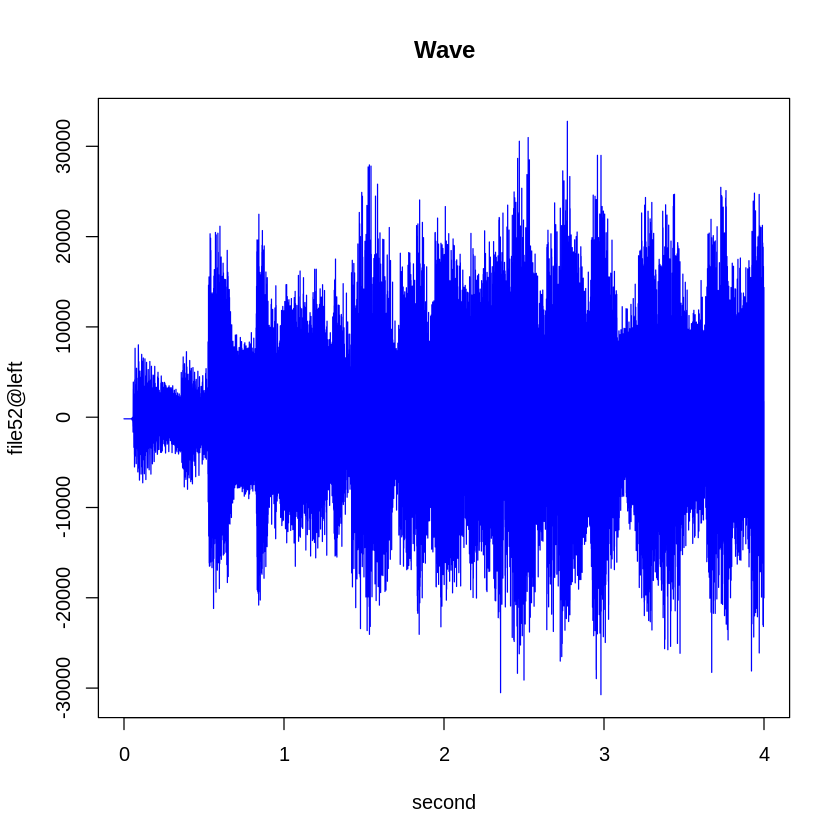

In [ ]:
N <- length(file52@left)
xt <- seq(0, N/file52@samp.rate, length.out = N)
matplot(xt,file52@left,type ="l",xlab = "second",col="blue",main = "Wave")

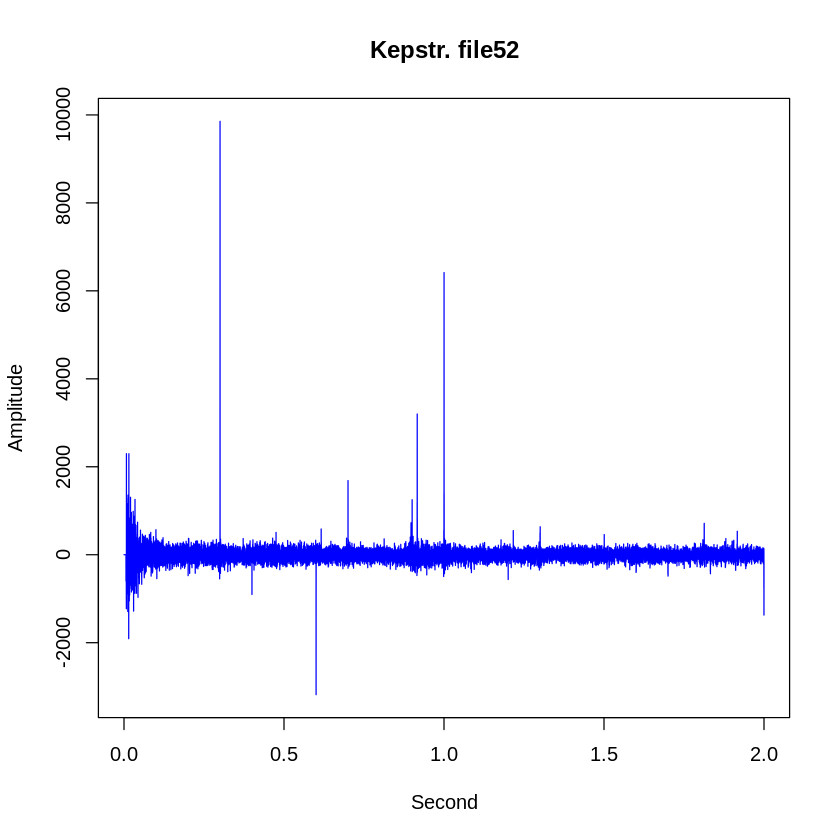

In [203]:
lecho<-ceps(file52,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
lecho[1:50,2]<- 0

matplot(lecho[,1],lecho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr. file52" )

In [141]:
#findecho
max(lecho)
delayindex = which(lecho == max(lecho)) - (length(lecho) / 2)

[1] 9854.678

In [145]:
timestep = lecho[2]

In [142]:
delay1 = lecho[delayindex]

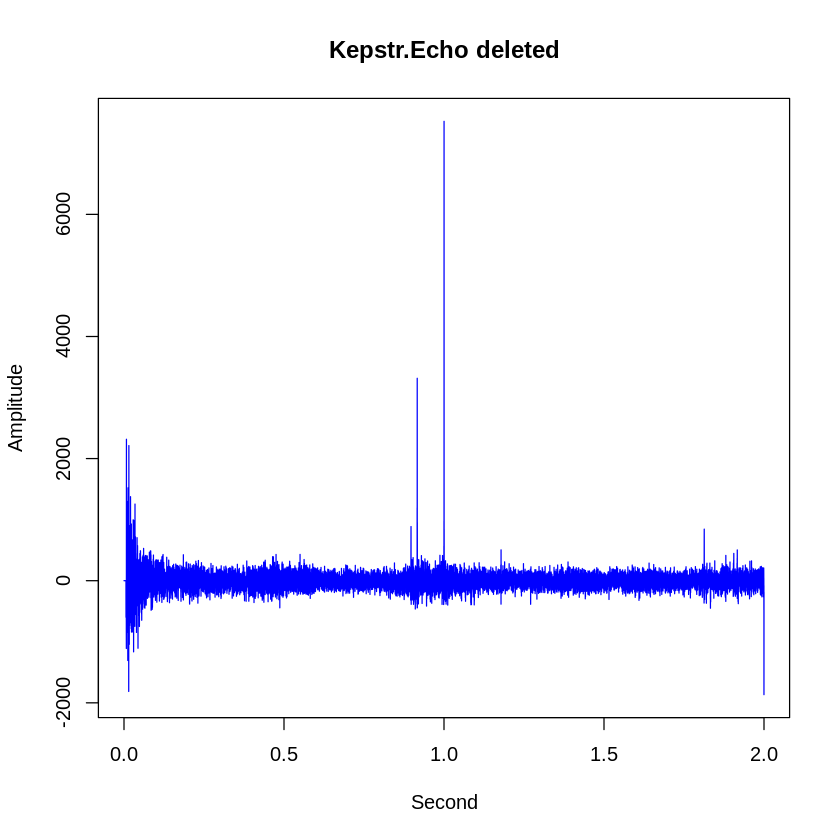

In [204]:
delayindex = which(lecho == max(lecho)) - (length(lecho) / 2)
delay1 = lecho[delayindex]
d1 <- deleteecho(file52,lecho,file52@samp.rate, delay1 - timestep, 0.9)

decho<-ceps(d1,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

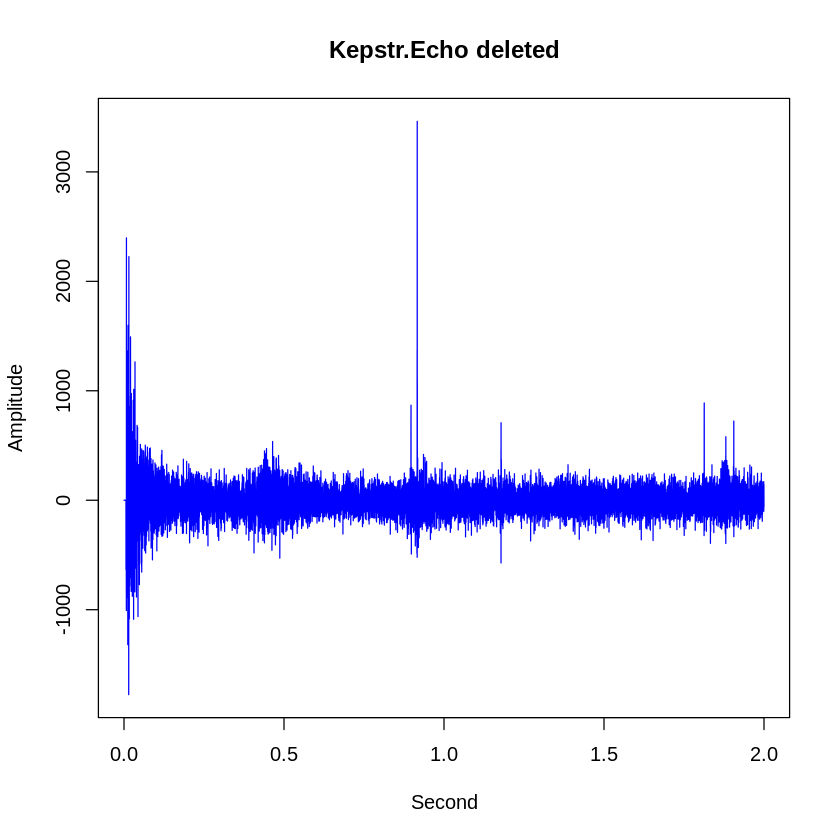

In [206]:
temp <- lecho[delayindex + (length(lecho) / 2)]
lecho[delayindex + (length(lecho) / 2)] <- 0
delayindex2 = which(lecho == max(lecho)) - (length(lecho) / 2)
delay2 = lecho[delayindex2]
lecho[delayindex + (length(lecho) / 2)] <- temp
d2 <- deleteecho(d1,lecho,file52@samp.rate, delay2 - timestep, 0.8)

decho<-ceps(d2,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

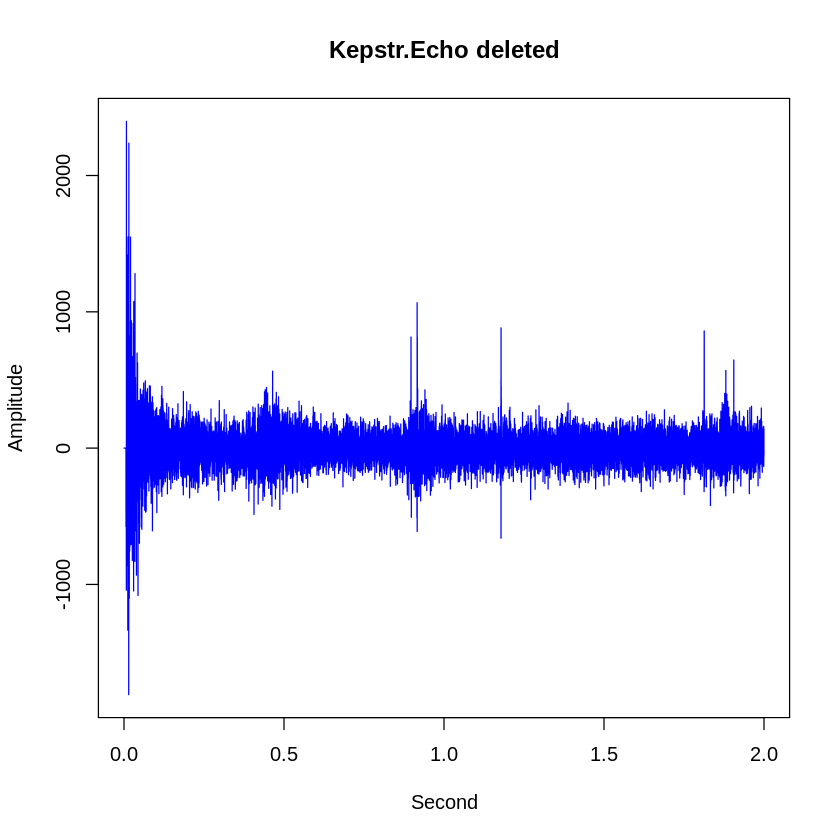

In [212]:
temp1 <- lecho[delayindex + (length(lecho) / 2)]
lecho[delayindex + (length(lecho) / 2)] <- 0
temp2 <- lecho[delayindex2 + (length(lecho) / 2)]
lecho[delayindex2 + (length(lecho) / 2)] <- 0
delayindex3 = which(lecho == max(lecho)) - (length(lecho) / 2)
delay3 = lecho[delayindex3]
lecho[delayindex + (length(lecho) / 2)] <- temp1
lecho[delayindex2 + (length(lecho) / 2)] <- temp2
d3 <- deleteecho(d2,lecho,file52@samp.rate, delay3 - timestep, 0.3)

decho<-ceps(d3,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

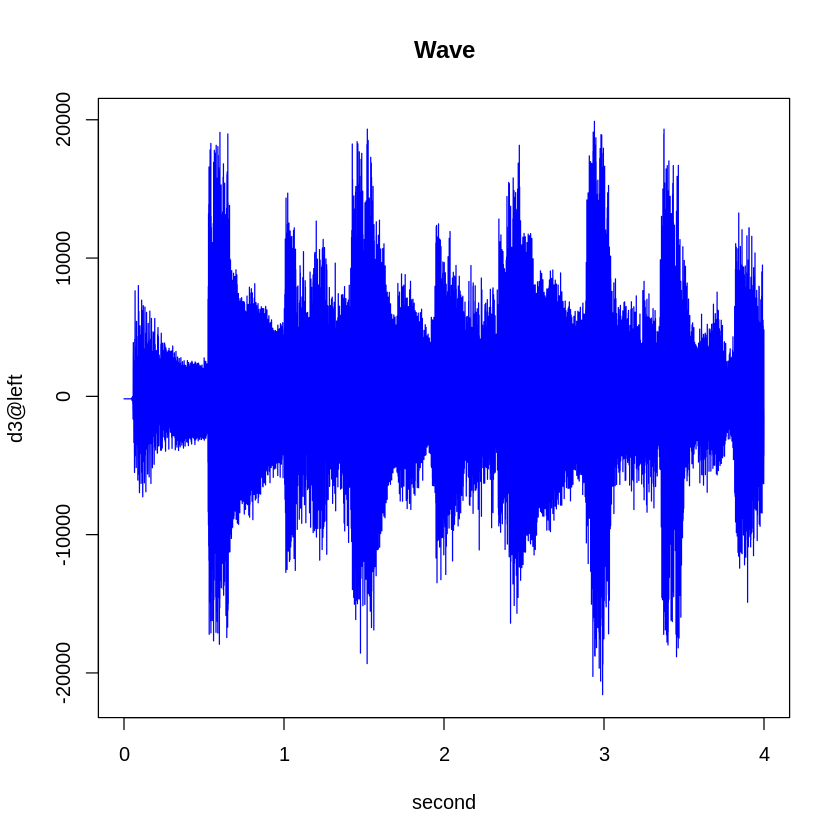

In [213]:
N <- length(d3@left)
xt <- seq(0, N/d3@samp.rate, length.out = N)
matplot(xt,d3@left,type ="l",xlab = "second",col="blue",main = "Wave")

In [214]:
writeWave(d3, "file52.wav")

In [215]:
file53 <- readWave("var5_3.wav")

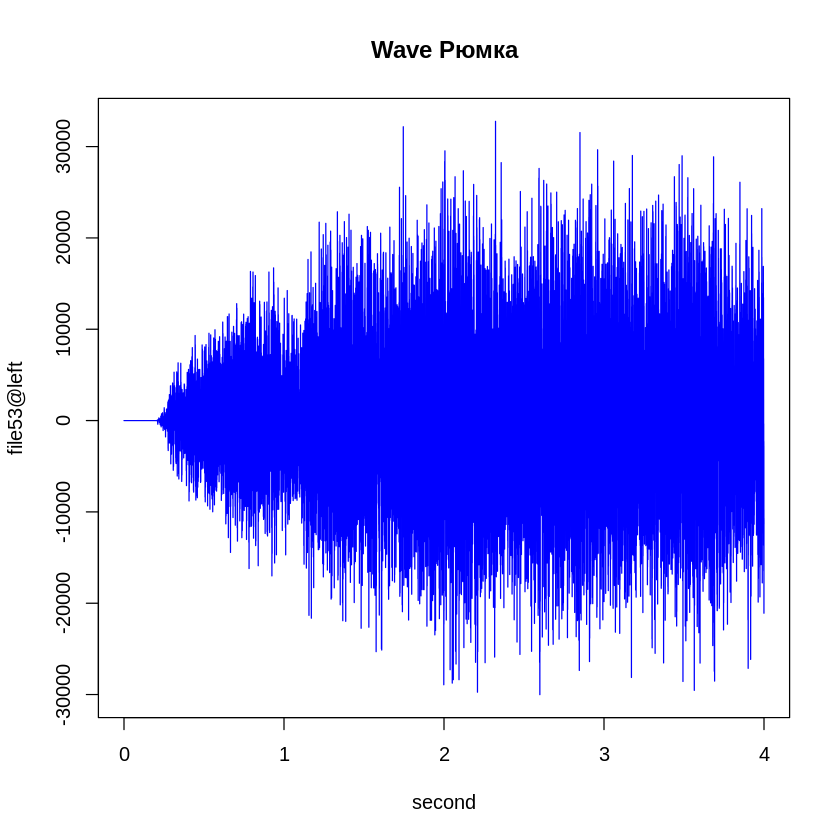

In [217]:
N <- length(file53@left)
xt <- seq(0, N/file53@samp.rate, length.out = N)
matplot(xt,file53@left,type ="l",xlab = "second",col="blue",main = "Wave Рюмка")

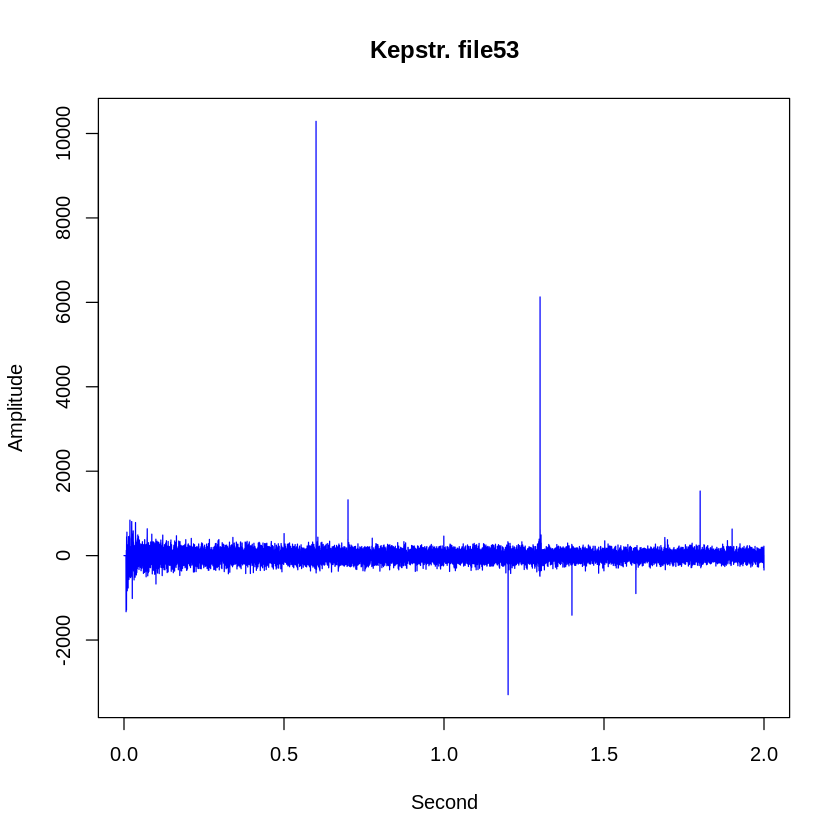

In [218]:
lecho<-ceps(file53,file53@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file53 Kepstrum")
lecho[1:50,2]<- 0

matplot(lecho[,1],lecho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr. file53" )

[1] 10288.49

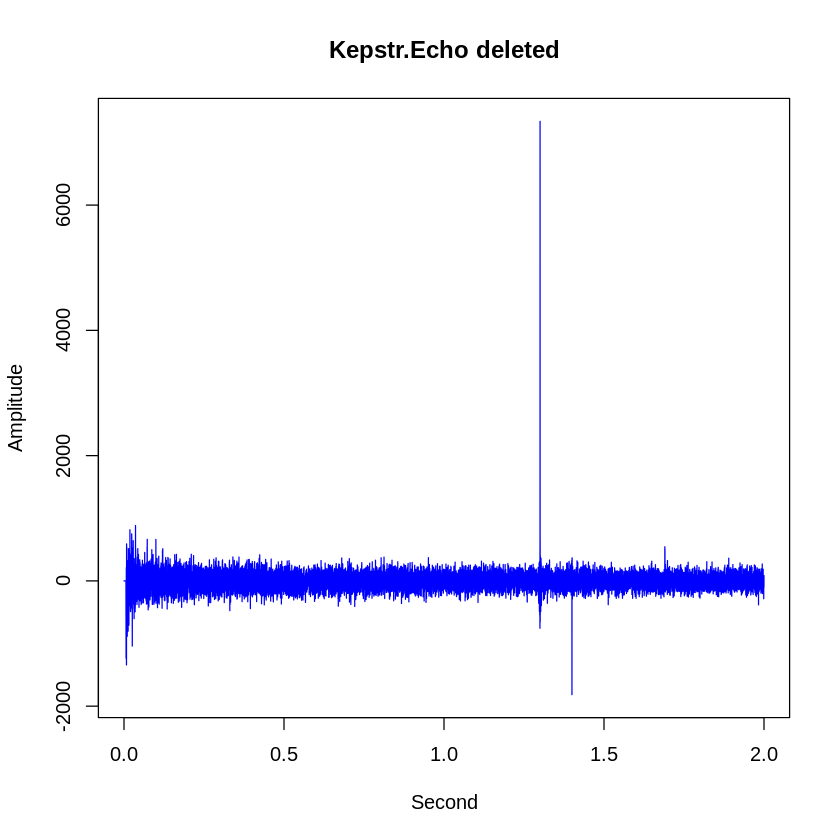

In [219]:
#findecho
max(lecho)
timestep = lecho[2]

delayindex = which(lecho == max(lecho)) - (length(lecho) / 2)
delay1 = lecho[delayindex]
d1 <- deleteecho(file53,lecho,file53@samp.rate, delay1 - timestep, 0.9)

decho<-ceps(d1,file53@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file53 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

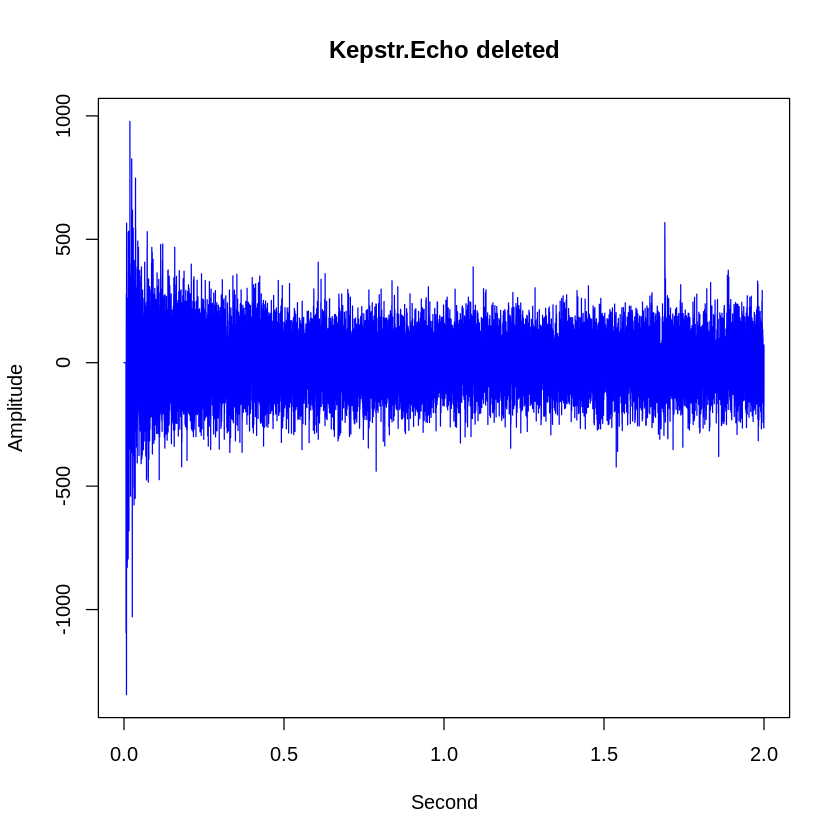

In [220]:
temp <- lecho[delayindex + (length(lecho) / 2)]
lecho[delayindex + (length(lecho) / 2)] <- 0
delayindex2 = which(lecho == max(lecho)) - (length(lecho) / 2)
delay2 = lecho[delayindex2]
lecho[delayindex + (length(lecho) / 2)] <- temp
d2 <- deleteecho(d1,lecho,file52@samp.rate, delay2 - timestep, 0.8)

decho<-ceps(d2,file52@samp.rate,wl=512,plot = FALSE,lwd = 2,col = "blue",main = "file52 Kepstrum")
decho[1:50,2]<- 0
matplot(decho[,1],decho[,2],type = "l",xlab = "Second",ylab = "Amplitude",col = "blue",main = "Kepstr.Echo deleted" )

In [221]:
writeWave(d2, "file53.wav")

In [ ]:
deleteecho<-function(w,kep,f,delay,Magnit)
{

  kepnum <- as.vector(kep[,2],mode = "numeric")
  n <- length(kepnum)
  delayIndex <-as.integer(delay/(1 / f))
  delayIndex <- min(delayIndex,n)+1
  Coeff <- -Magnit;
  Shift <- delayIndex;
  resl = w@left
  m <- length(resl)
  ret <- w
  while(Shift <= m)
  {
    for(i in (Shift+1):m)
    {
      dl = w@left[i-Shift]
      resl[i] <- as.integer(resl[i]+ Coeff*dl)
    }
    Shift <- Shift + delayIndex;
    Coeff <- -Coeff*Magnit;
  }
  ret@left <- resl
  if (w@stereo== TRUE)
  {
    Coeff <- -Magnit;
    Shift <- delayIndex;
    resr = w@right
    m <- length(resr)
    while(Shift <= m)
    {
      for(i in (Shift+1):m)
      {

        dr = w@right[i-Shift]
        resr[i] <- as.integer(resr[i]+ Coeff*dr)
      }
      Shift <- Shift + delayIndex;
      Coeff <- -Coeff*Magnit;
    }
    ret@right <- resr
  }

  return(ret)
}